In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### PassengerId: Unique identifier for each passenger.
### Survived: Whether the passenger survived (1) or died (0) (target variable for prediction).
### Passenger Class (Pclass): Higher-class passengers had a higher chance of survival because of proximity to lifeboats and other factors.
### Name: Name of the passenger.
### Sex: Gender of the passenger (male or female).
### Age: Age of the passenger.
### SibSp: Number of siblings or spouses aboard the Titanic.
### Parch: Number of parents or children aboard the Titanic.
### Ticket: Ticket number.
### Fare: Fare paid by the passenger.
### Cabin: Cabin number where the passenger stayed.
### Embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

In [2]:
# Load the Titanic dataset
data = pd.read_csv(r"C:\Users\nisal\Downloads\Machine-Learning\data\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
# Check for missing values
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# Fill missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)  # Fill Age with the mean
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)  # Fill Fare with the most frequent value

In [6]:
# Drop unnecessary columns
data.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


In [8]:
# Encode categorical columns like Sex and Embarked
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

In [9]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2


In [10]:
# Define features and target
X = data.drop(columns=['Survived'])
y = data['Survived']

In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Create and train the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 1.00
Recall: 1.00
F1-Score: 1.00


In [17]:
# ROC-AUC Curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
auc = roc_auc_score(y_test, y_pred)

print(f'AUC: {auc:.2f}')

AUC: 1.00


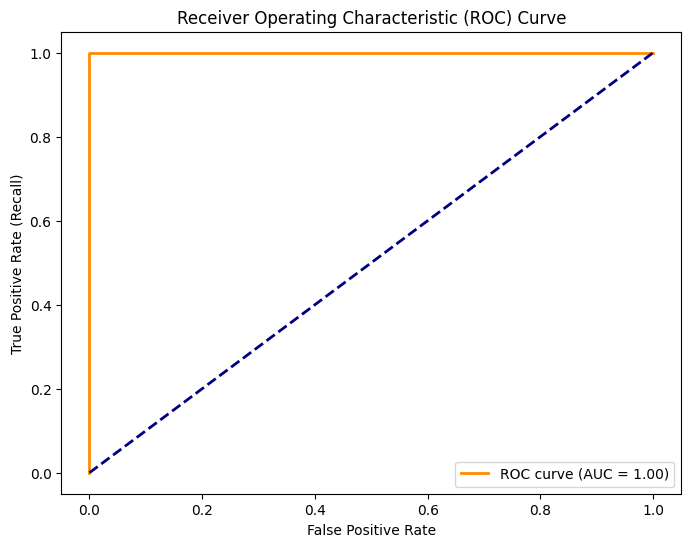

In [18]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

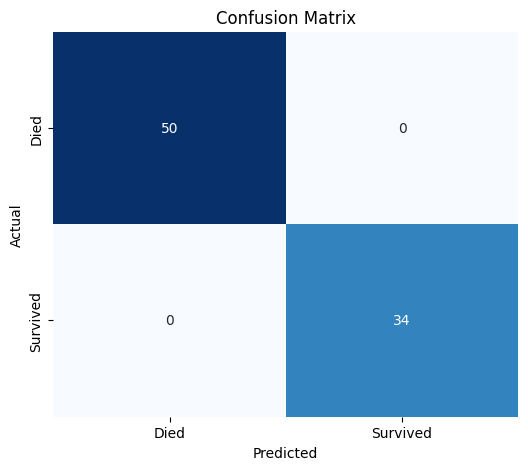

In [19]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'], cbar=False)

# Adding labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.show()

In [20]:
from sklearn.tree import plot_tree

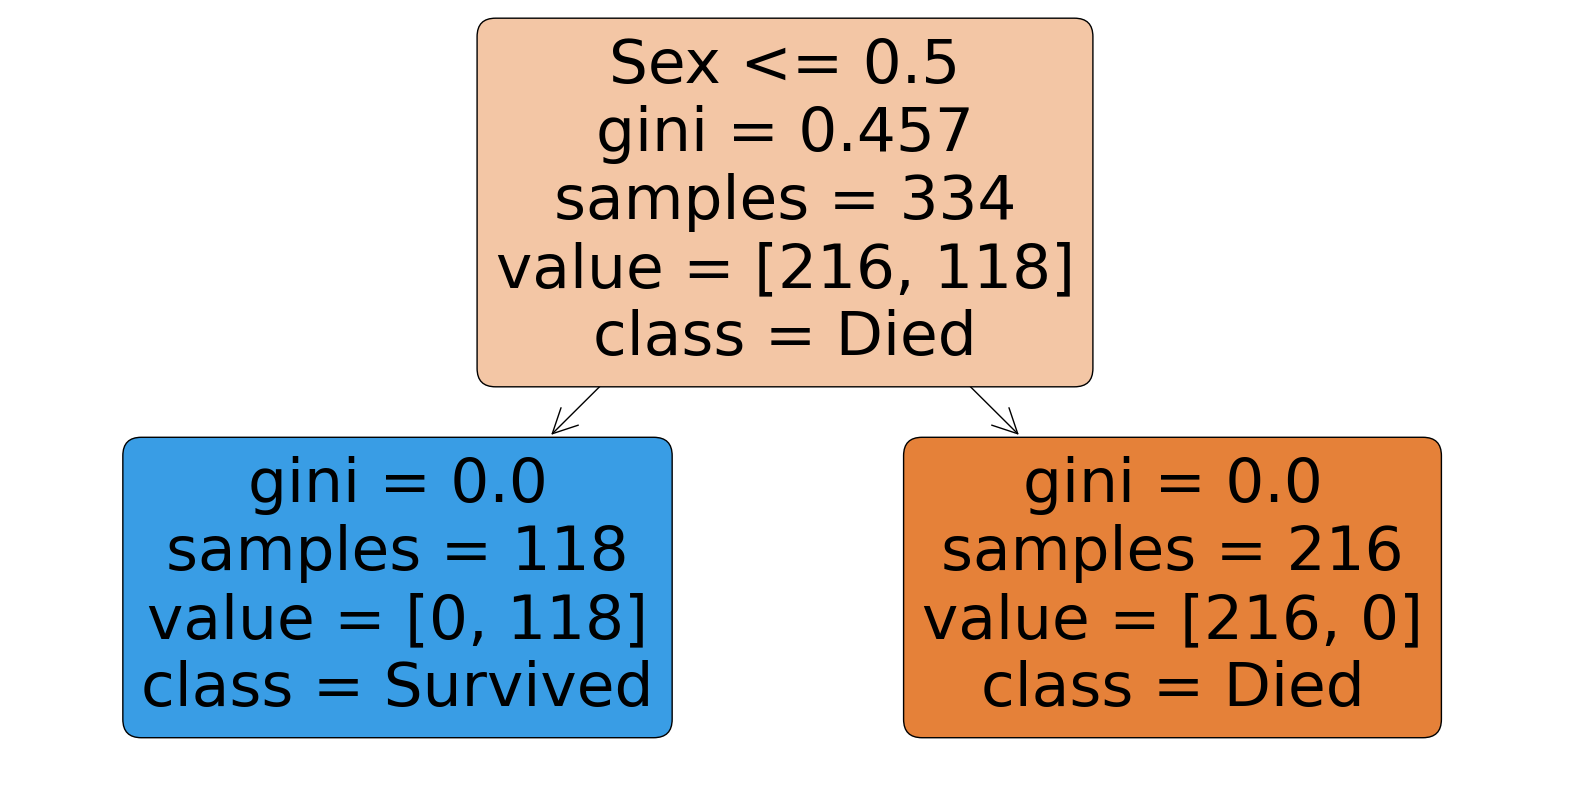

In [21]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'], rounded=True)
plt.show()

In [22]:
import joblib

In [23]:
joblib.dump(model, 'titanic_decision_tree_model.pkl')

['titanic_decision_tree_model.pkl']

In [24]:
# Load the saved model from the file
loaded_model = joblib.load('titanic_decision_tree_model.pkl')

new_data = np.array([
    [3, 2,'male', 47.0, 1, 0, 7.0, 'S']
])

In [25]:
label_encoder = LabelEncoder()
new_data[:, 2] = label_encoder.fit_transform(new_data[:, 1])  # Encode 'Sex' (male -> 1, female -> 0)
new_data[:, 7] = label_encoder.fit_transform(new_data[:, 6])  # Encode 'Embarked' (S -> 2, C -> 0, Q -> 1)

In [26]:
new_data = new_data.astype(float)  # Ensure all data is numeric

new_predictions = loaded_model.predict(new_data)
print("Prediction for new data:", "Survived" if new_predictions[0] == 1 else "Did not survive")

Prediction for new data: Survived


C:\Users\nisal\AppData\Local\anaconda3\envs\threepointeight\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
